In [2]:
# ============================
# breast cancer: Preprocess → GaussianNB → Metrics → Simple Viz
# ============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --------------------------
# 1) Load & tidy
# --------------------------
cancer = load_breast_cancer(as_frame=True)

# Convert to DataFrame and rename columns for readability
df = cancer.frame.rename(columns={
    "mean radius": "mean_radius",
    "mean texture": "mean_texture",
    "mean perimeter": "mean_perimeter",
    "mean area": "mean_area",
    "mean smoothness": "mean_smoothness",
    "mean compactness": "mean_compactness",
    "mean concavity": "mean_concavity",
    "mean concave points": "mean_concave_points",
    "mean symmetry": "mean_symmetry",
    "mean fractal dimension": "mean_fractal_dimension",
    "radius error": "radius_error",
    "texture error": "texture_error",
    "perimeter error": "perimeter_error",
    "area error": "area_error",
    "smoothness error": "smoothness_error",
    "compactness error": "compactness_error",
    "concavity error": "concavity_error",
    "concave points error": "concave_points_error",
    "symmetry error": "symmetry_error",
    "fractal dimension error": "fractal_dimension_error",
    "worst radius": "worst_radius",
    "worst texture": "worst_texture",
    "worst perimeter": "worst_perimeter",
    "worst area": "worst_area",
    "worst smoothness": "worst_smoothness",
    "worst compactness": "worst_compactness",
    "worst concavity": "worst_concavity",
    "worst concave points": "worst_concave_points",
    "worst symmetry": "worst_symmetry",
    "worst fractal dimension": "worst_fractal_dimension"
})

# Add readable diagnosis labels
df["diagnosis"] = cancer.target_names[cancer.target]

# Display
print("Head of dataset:\n", df.head(), "\n")

# --------------------------
# 2) Define X and y
# --------------------------
X = df.drop(columns=["target","diagnosis"]).to_numpy()  # all numeric features
y = cancer.target                              # numeric target (0 or 1)
class_names = cancer.target_names

# --------------------------
# 3) Preprocessing (scaling)
# --------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------
# 4) Train/Test Split
# --------------------------
X_tr, X_te, y_tr, y_te = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

# --------------------------
# 5) Gaussian Naive Bayes Model
# --------------------------
gnb = GaussianNB()
gnb.fit(X_tr, y_tr)

# --------------------------
# 6) Evaluate on test data
# --------------------------
y_pred = gnb.predict(X_te)
y_proba = gnb.predict_proba(X_te)

acc = accuracy_score(y_te, y_pred)
print(f"Test Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_te, y_pred, target_names=class_names))

cm = confusion_matrix(y_te, y_pred)
print("Confusion Matrix:\n", cm, "\n")

# --------------------------
# 7) Cross-validation
# --------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gnb, X_scaled, y, cv=cv, scoring="accuracy")
print(f"CV Accuracy: mean={cv_scores.mean():.4f}, std={cv_scores.std():.4f}, scores={np.round(cv_scores, 4)}\n")

# --------------------------
# 8) Query dataset for testing
# --------------------------
x_query = np.array([
    # Malignant-like sample (larger size, irregular features)
    [17.9, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.0787,
     1.095, 0.905, 8.59, 153.4, 0.0064, 0.049, 0.0537, 0.0159, 0.030, 0.0062,
     25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189],

    # Benign-like sample (smaller, smoother features)
    [13.5, 14.1, 87.0, 560.0, 0.0975, 0.081, 0.027, 0.014, 0.184, 0.062,
     0.25, 1.2, 1.7, 23.0, 0.004, 0.014, 0.010, 0.004, 0.021, 0.002,
     14.8, 20.2, 95.0, 670.0, 0.105, 0.16, 0.12, 0.06, 0.25, 0.07],

    # Another malignant-like (irregular shape)
    [20.3, 22.1, 135.2, 1320.0, 0.108, 0.224, 0.289, 0.146, 0.250, 0.060,
     0.75, 1.03, 5.0, 67.5, 0.005, 0.035, 0.045, 0.012, 0.020, 0.003,
     23.1, 26.5, 160.3, 1500.0, 0.140, 0.45, 0.55, 0.22, 0.35, 0.090],

    # Benign-like
    [11.0, 12.9, 71.0, 370.0, 0.089, 0.060, 0.014, 0.010, 0.180, 0.062,
     0.30, 0.9, 2.0, 30.0, 0.005, 0.013, 0.012, 0.004, 0.020, 0.002,
     12.3, 14.8, 80.0, 460.0, 0.095, 0.14, 0.10, 0.045, 0.20, 0.060],

    # Malignant-like (higher compactness and concavity)
    [19.8, 21.0, 130.0, 1200.0, 0.112, 0.260, 0.345, 0.160, 0.230, 0.076,
     0.90, 1.1, 4.2, 90.0, 0.007, 0.042, 0.050, 0.016, 0.030, 0.005,
     23.5, 25.2, 165.0, 1800.0, 0.155, 0.55, 0.65, 0.25, 0.40, 0.110]
])

# Scale query samples using same scaler
x_query_scaled = scaler.transform(x_query)
query_pred_idx = gnb.predict(x_query_scaled)
query_pred = [class_names[i] for i in query_pred_idx]
query_proba = gnb.predict_proba(x_query_scaled)

print("Query predictions:", query_pred)
print("Query probabilities:\n", np.round(query_proba, 3), "\n")


Head of dataset:
    mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean_fractal_dimension  ...  worst_perimeter  worst_area  worst_smoothn

Information Gain per feature:
worst perimeter            0.685889
worst concave points       0.077020
worst texture              0.076738
worst smoothness           0.057138
fractal dimension error    0.023763
area error                 0.017597
worst symmetry             0.017288
worst fractal dimension    0.013473
worst radius               0.011973
mean symmetry              0.007379
worst area                 0.006659
mean concavity             0.005082
mean radius                0.000000
mean perimeter             0.000000
perimeter error            0.000000
texture error              0.000000
radius error               0.000000
mean fractal dimension     0.000000
mean concave points        0.000000
mean area                  0.000000
mean smoothness            0.000000
mean compactness           0.000000
mean texture               0.000000
symmetry error             0.000000
concavity error            0.000000
concave points error       0.000000
smoothness error           0.00000

[Text(0.54, 0.9375, 'worst perimeter <= 105.95\nentropy = 0.953\nsamples = 569\nvalue = [212, 357]\nclass = benign'),
 Text(0.3, 0.8125, 'worst concave points <= 0.135\nentropy = 0.283\nsamples = 345\nvalue = [17, 328]\nclass = benign'),
 Text(0.42000000000000004, 0.875, 'True  '),
 Text(0.16, 0.6875, 'area error <= 48.975\nentropy = 0.097\nsamples = 320\nvalue = [4, 316]\nclass = benign'),
 Text(0.08, 0.5625, 'worst texture <= 30.145\nentropy = 0.055\nsamples = 316\nvalue = [2, 314]\nclass = benign'),
 Text(0.04, 0.4375, 'entropy = 0.0\nsamples = 274\nvalue = [0, 274]\nclass = benign'),
 Text(0.12, 0.4375, 'worst texture <= 30.265\nentropy = 0.276\nsamples = 42\nvalue = [2, 40]\nclass = benign'),
 Text(0.08, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = malignant'),
 Text(0.16, 0.3125, 'worst smoothness <= 0.141\nentropy = 0.165\nsamples = 41\nvalue = [1, 40]\nclass = benign'),
 Text(0.12, 0.1875, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33]\nclass = benign'),
 Text(0.

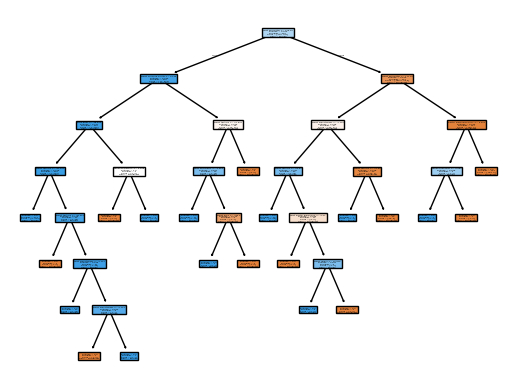

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Load dataset as pandas DataFrame
data = load_breast_cancer(as_frame=True)
df = data.frame  # this is the actual pandas DataFrame

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Create Decision Tree using entropy (Information Gain)
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

# Display feature importances (Information Gain equivalents)
info_gain_values = pd.Series(clf.feature_importances_, index=X.columns)
best_feature = info_gain_values.idxmax()

print("Information Gain per feature:")
print(info_gain_values.sort_values(ascending=False))
print("\nBest split feature:", best_feature)

# Optional: visualize the tree
tree.plot_tree(clf, feature_names=X.columns, class_names=data.target_names, filled=True)


In [2]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split data into train & test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train ANN model
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate model
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=cancer.target_names))

# ==============================
# 🔹 ENTER YOUR OWN INPUT BELOW
# ==============================
# Example user input for breast cancer dataset
user_input = np.array([[17.99, 10.38, 122.80, 1001.0, 0.11840,
                        0.27760, 0.30010, 0.14710, 0.2419, 0.07871,
                        1.0950, 0.9053, 8.589, 153.4, 0.006399,
                        0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
                        25.38, 17.33, 184.6, 2019.0, 0.1622,
                        0.6656, 0.7119, 0.2654, 0.4601, 0.11890]])

# Scale input using same scaler
user_input_scaled = scaler.transform(user_input)

# Predict
predicted_class = mlp.predict(user_input_scaled)
predicted_name = cancer.target_names[predicted_class[0]]

print("\n🌼 Predicted Iris species for your input:", predicted_name)


Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        43
      benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


🌼 Predicted Iris species for your input: malignant
